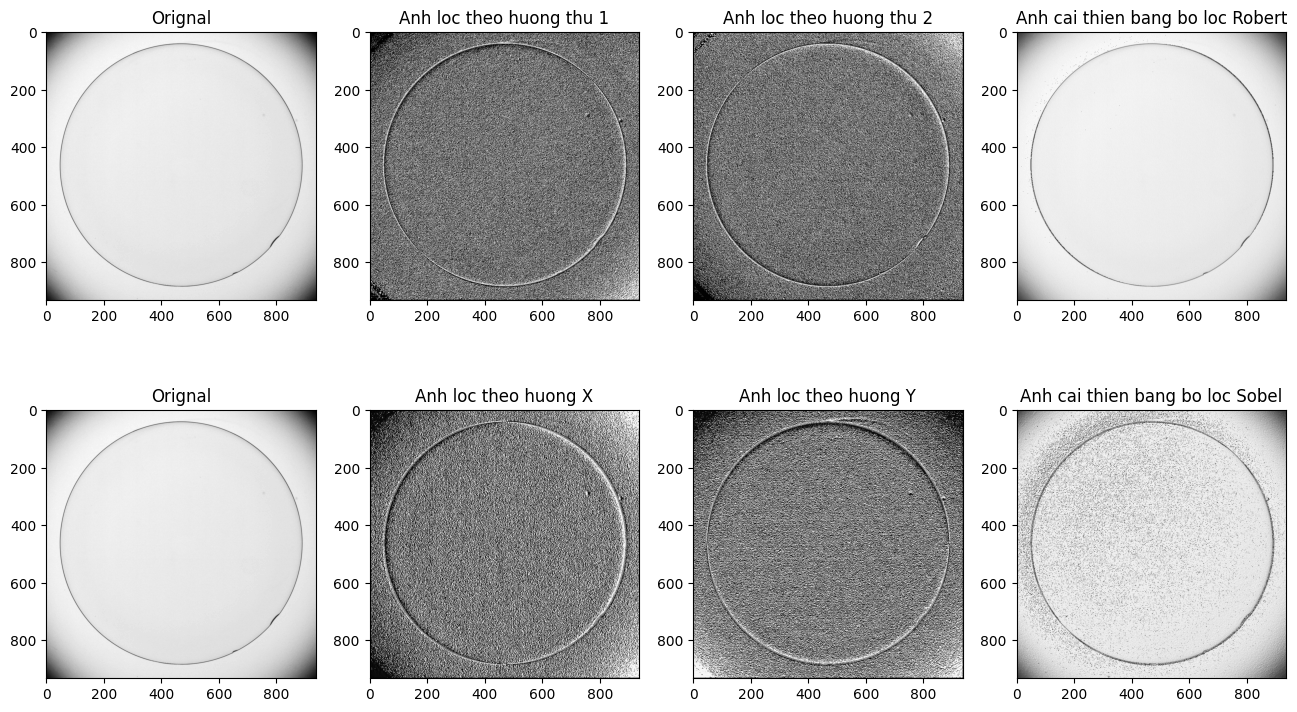

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
#plt.rcParams.update({"text.usetex":True})
class highpass_filter(object):
    '''Các bộ lọc cơ bản trong highpass filter'''
    def __init__(self,image) -> None:
        '''constructor: 
            - Ảnh đầu vào
        '''
        self.img=image
    def init_kernel(self, kernel_name:str):
        '''
        Nhập vào tên kernel:
            - RobertCross: xem kết quả lọc sắc nét bằng bộ lọc RobertCrossGradient
            - RobertCross1: xem Lọc RobertCross theo hướng 1
            - RobertCross2: xem Lọc RobertCross theo hướng 2
            - Sobel: xem kết quả lọc sắc nét bằng bộ lọc Sobel
            - SobelX: xem Bộ lọc Sobel theo hướng X
            - SobelY: xem Bộ lọc Sobel theo hướng Y

        '''
        if kernel_name=="RobertCross":
            return self.show_SharpenedRobert()
        elif kernel_name=="RobertCross1":
            return self.show_RobertCrossGradient1()
        elif kernel_name=="RobertCross2":
            return self.show_RobertCrossGradient2()
        elif kernel_name=="Sobel":
            return self.show_SharpenedSobel()
        elif kernel_name=="SobelX":
            return self.show_SobelX()
        elif kernel_name=="SobelY":
            return self.show_SobelY()
        else:
            return self.img
    def Convolution2D(self,kernel):
        m, n = self.img.shape
        img_new = np.zeros([m, n])
        for i in range(1, m-1):
            for j in range(1, n-1):
                temp=  self.img[i-1, j-1]    * kernel[0, 0]\
                    +  self.img[i, j-1]      * kernel[0, 1]\
                    +  self.img[i+1, j - 1]  * kernel[0, 2]\
                    +  self.img[i-1, j]      * kernel[1, 0]\
                    +  self.img[i, j]        * kernel[1, 1]\
                    +  self.img[i+1, j]      * kernel[1, 2]\
                    +  self.img[i - 1, j+1]  * kernel[2, 0]\
                    +  self.img[i, j + 1]    * kernel[2, 1]\
                    +  self.img[i + 1, j + 1]* kernel[2, 2]
                img_new[i, j]= temp
        img_new = img_new.astype(np.uint8)
        return img_new
    def show_RobertCrossGradient1(self):
        '''Kết quả RobertCrossGradient theo hướng thứ nhất'''
        G_cross1 = np.array(([0, 0, 0], [0,-1, 0], [0, 0, 1]), dtype="float")
        return self.Convolution2D(G_cross1)
    def show_RobertCrossGradient2(self):
        '''Kết quả RobertCrossGradient theo hướng thứ nhất'''
        G_cross2 = np.array(([0, 0, 0], [0, 0,-1], [0, 1, 0]), dtype="float")
        return self.Convolution2D(G_cross2)
    def show_SharpenedRobert(self):
        '''Kết quả Lọc sắc nét sử dụng bộ lọc RobertCrossGradient theo 2 hướng chéo'''
        return self.show_RobertCrossGradient1()+self.show_RobertCrossGradient2()+self.img
    def show_SobelX(self):
        '''Bộ lọc Sobel theo hướng X'''
        SobelX = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]), dtype="float")
        return self.Convolution2D(SobelX)

    def show_SobelY(self):
        '''Bộ lọc Sobel theo hướng Y'''
        SobelY = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]), dtype="float")
        return self.Convolution2D(SobelY)
    def show_SharpenedSobel(self):
        '''Bộ lọc Sobel''' 
        return self.show_SobelX()+self.show_SobelY()+self.img

    
if __name__=='__main__':
    # Đọc và hiển thị ảnh gốc
    
    image = cv2.imread('D:/len.tif', 0)

    fig=plt.figure(figsize=(16, 9))
    ax=fig.subplots(2,4)
    # hien thi anh goc 
    ax[0,0].set_title("Orignal")
    ax[0,0].imshow(image,cmap="gray")
    ## Su dung bo loc RobertCrossGradient
    # hien thi anh loc Robert theo huong thu 1 
    Robertcross1=highpass_filter(image).init_kernel("RobertCross1")
    ax[0,1].imshow(Robertcross1,cmap='gray')
    ax[0,1].set_title("Anh loc theo huong thu 1")
    # hien thi anh loc Robert theo huong thu 2 
    Robertcross2=highpass_filter(image).init_kernel("RobertCross2")
    ax[0,2].imshow(Robertcross2,cmap='gray')
    ax[0,2].set_title("Anh loc theo huong thu 2")
    # Ket qua anh loc sac net bang bo loc Robert
    Robertcross=highpass_filter(image).init_kernel("RobertCross")
    ax[0,3].imshow(Robertcross,cmap='gray')
    ax[0,3].set_title("Anh cai thien bang bo loc Robert")
    # plt.savefig("filter_Robert.pdf",bbox_inches='tight')
    ax[1,0].set_title("Orignal")
    ax[1,0].imshow(image,cmap="gray")
    Sobelx=highpass_filter(image).init_kernel("SobelX")
    ax[1,1].imshow(Sobelx,cmap='gray')
    ax[1,1].set_title("Anh loc theo huong X")
    Sobely=highpass_filter(image).init_kernel("SobelY")
    ax[1,2].imshow(Sobely,cmap='gray')
    ax[1,2].set_title("Anh loc theo huong Y")
    sobel=highpass_filter(image).init_kernel("Sobel")
    ax[1,3].imshow(sobel,cmap='gray')
    ax[1,3].set_title("Anh cai thien bang bo loc Sobel")
    plt.show()

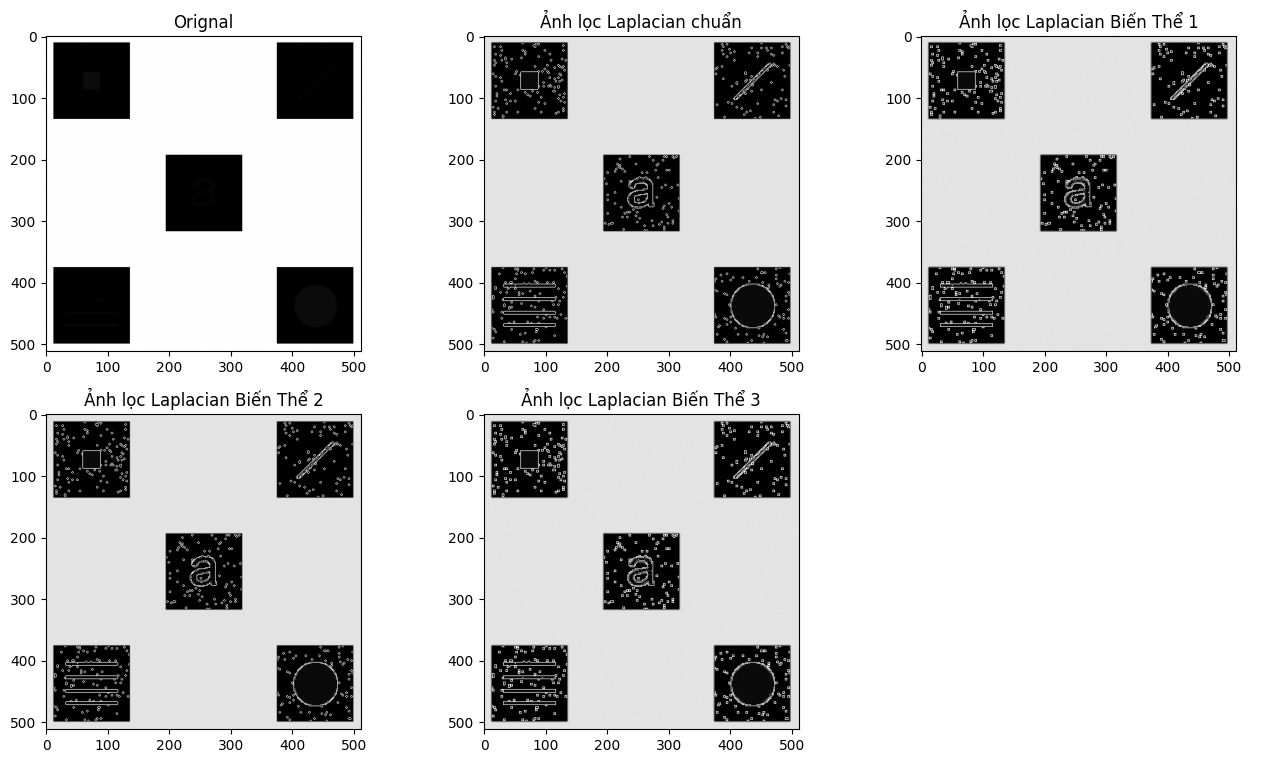

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
class highpass_filter(object):
    '''Các bộ lọc cơ bản trong highpass filter'''
    def __init__(self,image) -> None:
        '''constructor: 
            - Ảnh đầu vào
        '''
        self.img=image
    def init_kernel(self, kernel_name:str):
        '''
        Nhập vào tên kernel:
            - Laplacian: Xem kết quả lọc sắc nét bằng bộ lọc Laplacian chuẩn
            - Laplacian1: Xem kết quả lọc sắc nét bằng bộ lọc Laplacian biến thể 1
            - Laplacian2: Xem kết quả lọc sắc nét bằng bộ lọc Laplacian biến thể 2
            - Laplacian3: Xem kết quả lọc sắc nét bằng bộ lọc Laplacian biến thể 3
        '''
        if kernel_name=="Laplacian":
            return self.show_SharpenedLaplacian()
        elif kernel_name=="LaplacianV1":
            return self.show_SharpenedLaplacianV1()
        elif kernel_name=="LaplacianV2":
            return self.show_SharpenedLaplacianV2()
        elif kernel_name=="LaplacianV3":
            return self.show_SharpenedLaplacianV3()
        else:
            return self.img
    def Convolution2D(self,kernel):
        m, n = self.img.shape
        img_new = np.zeros([m, n])
        for i in range(1, m-1):
            for j in range(1, n-1):
                temp=  self.img[i-1, j-1]    * kernel[0, 0]\
                    +  self.img[i, j-1]      * kernel[0, 1]\
                    +  self.img[i+1, j - 1]  * kernel[0, 2]\
                    +  self.img[i-1, j]      * kernel[1, 0]\
                    +  self.img[i, j]        * kernel[1, 1]\
                    +  self.img[i+1, j]      * kernel[1, 2]\
                    +  self.img[i - 1, j+1]  * kernel[2, 0]\
                    +  self.img[i, j + 1]    * kernel[2, 1]\
                    +  self.img[i + 1, j + 1]* kernel[2, 2]
                img_new[i, j]= temp
        img_new = img_new.astype(np.uint8)
        return img_new
    def show_SharpenedLaplacian(self):
        '''Bộ lọc Laplacian chuẩn'''
        Laplacian_kerner = np.array(([0, 1, 0], [1, -4, 1], [0, 1, 0]),
                                    dtype="float")
        return self.img-self.Convolution2D(Laplacian_kerner)
    def show_SharpenedLaplacianV1(self):
        '''Bộ lọc Laplacian Biến Thể V1'''
        Laplacian_kerner = np.array(([1, 1, 1], [1, -8, 1], [1, 1, 1]),
                                    dtype="float")
        return self.img-self.Convolution2D(Laplacian_kerner)
    def show_SharpenedLaplacianV2(self):
        '''Bộ lọc Laplacian Biến Thể V2'''
        Laplacian_kerner = np.array(([0, -1, 0], [-1, 4, -1], [0, -1, 0]),
                                    dtype="float")
        return self.img+self.Convolution2D(Laplacian_kerner)
    def show_SharpenedLaplacianV3(self):
        '''Bộ lọc Laplacian Biến Thể V3'''
        Laplacian_kerner = np.array(([-1, -1, -1], [-1, 8, -1], [-1, -1, -1]),
                                    dtype="float")
        return self.img+self.Convolution2D(Laplacian_kerner)
if __name__=='__main__':
    # Đọc và hiển thị ảnh gốc
    
    image = cv2.imread('D:/laplapcian.tif', 0)

    fig=plt.figure(figsize=(16, 9))
    ax=fig.subplots(2,3)
    # hien thi anh goc 
    ax[0,0].set_title("Orignal")
    ax[0,0].imshow(image,cmap="gray")
    Laplacian=highpass_filter(image).init_kernel("Laplacian")
    ax[0,1].imshow(Laplacian,cmap='gray')
    ax[0,1].set_title("Ảnh lọc Laplacian chuẩn")
    LaplacianV1=highpass_filter(image).init_kernel("LaplacianV1")
    ax[0,2].imshow(LaplacianV1,cmap='gray')
    ax[0,2].set_title("Ảnh lọc Laplacian Biến Thể 1")
    LaplacianV2=highpass_filter(image).init_kernel("LaplacianV2")
    ax[1,0].imshow(LaplacianV2,cmap='gray')
    ax[1,0].set_title("Ảnh lọc Laplacian Biến Thể 2")
    LaplacianV3=highpass_filter(image).init_kernel("LaplacianV3")
    ax[1,1].imshow(LaplacianV3,cmap='gray')
    ax[1,1].set_title("Ảnh lọc Laplacian Biến Thể 3")
    ax[1,2].axis("off")
    plt.show()